In [1]:
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [2]:
mpg_df = read_excel("https://data.hossam.kr/D01/mpg.xlsx", index_col="id")
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


In [3]:
df = mpg_df.astype({'manufacturer': 'category', 'model': 'category', 'year': 'category',
                    'cyl': 'category', 'trans': 'category', 'drv': 'category',
                    'fl': 'category', 'class': 'category'})
df.dtypes

manufacturer    category
model           category
displ            float64
year            category
cyl             category
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object

In [4]:
plt.rcParams['font.family'] = "AppleGothic" if sys.platform == "darwin" else "Malgun Gothic"
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams['axes.unicode_minus'] = False

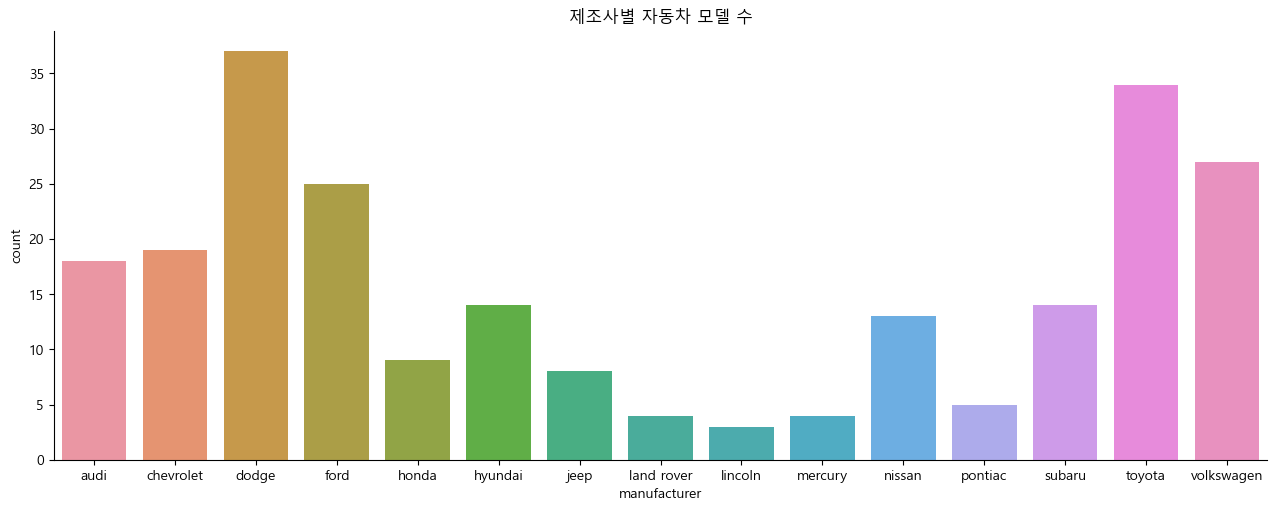

In [5]:
g = sb.catplot(data=df, x='manufacturer', kind='count')

g.fig.set_figwidth(15)
g.fig.set_figheight(5)

plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

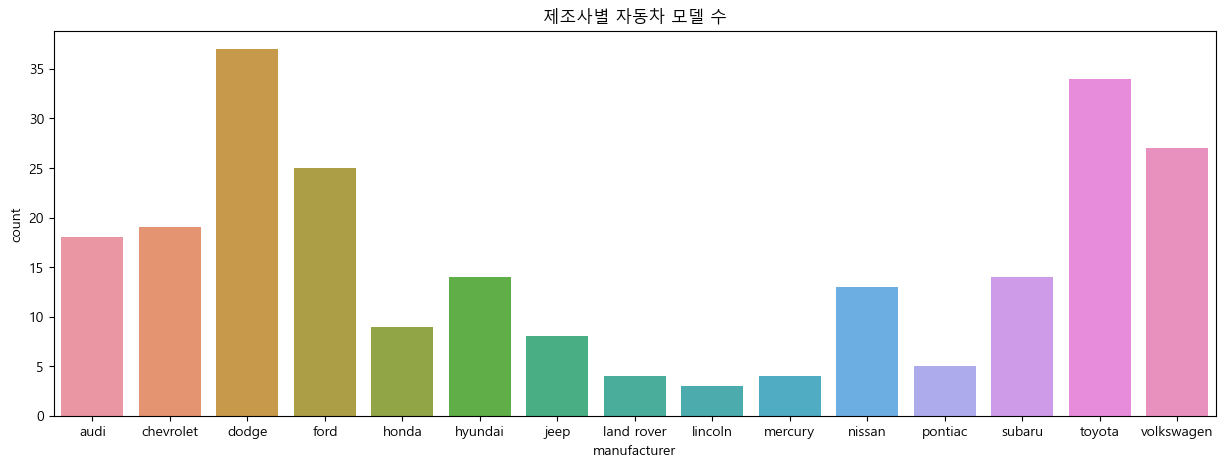

In [6]:
sb.countplot(data=df, x="manufacturer")
plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

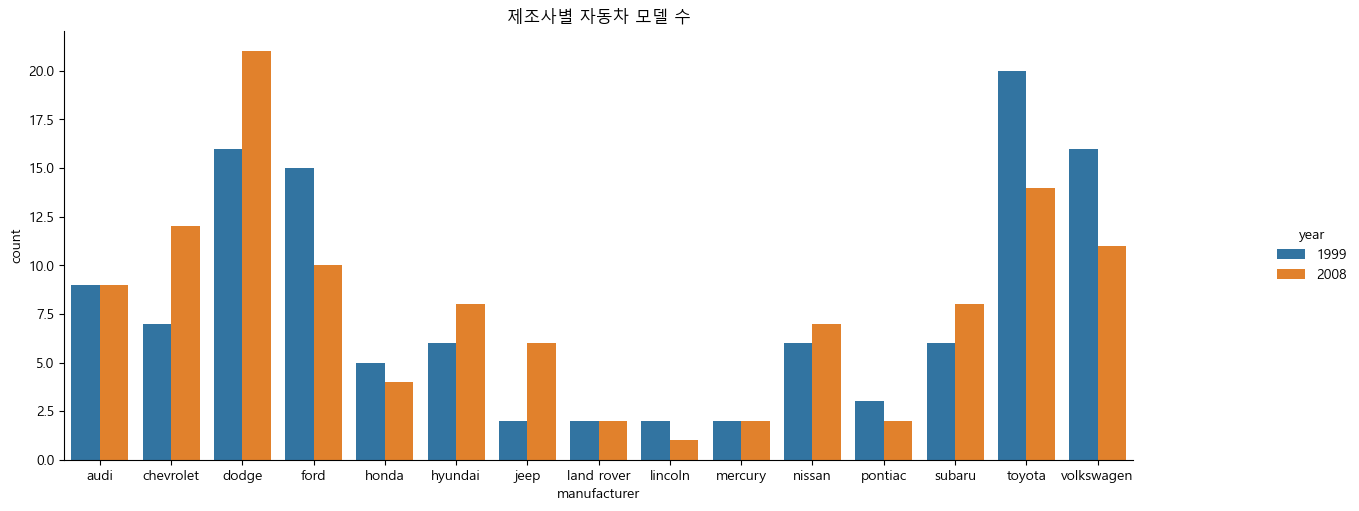

In [7]:
g = sb.catplot(data=df, x='manufacturer', kind='count', hue='year')

g.fig.set_figwidth(15)
g.fig.set_figheight(5)

plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

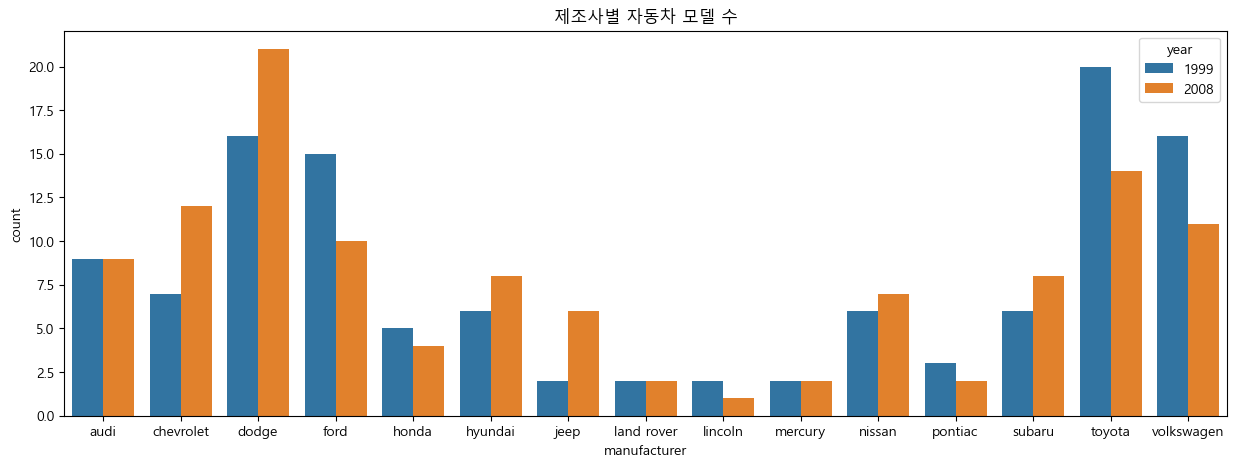

In [8]:
sb.countplot(data=df, x="manufacturer", hue='year')
plt.title("제조사별 자동차 모델 수")
plt.show()
plt.close()

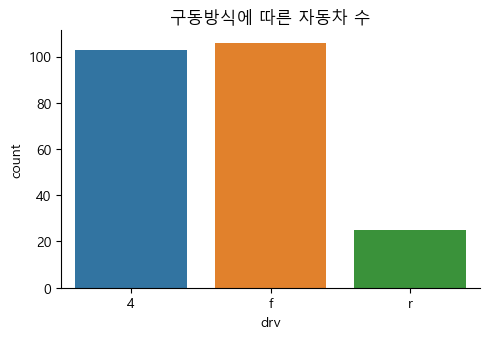

In [9]:
g = sb.catplot(data=df, x='drv', kind='count')

g.fig.set_figwidth(5)
g.fig.set_figheight(3)

plt.title("구동방식에 따른 자동차 수")
plt.show()
plt.close()

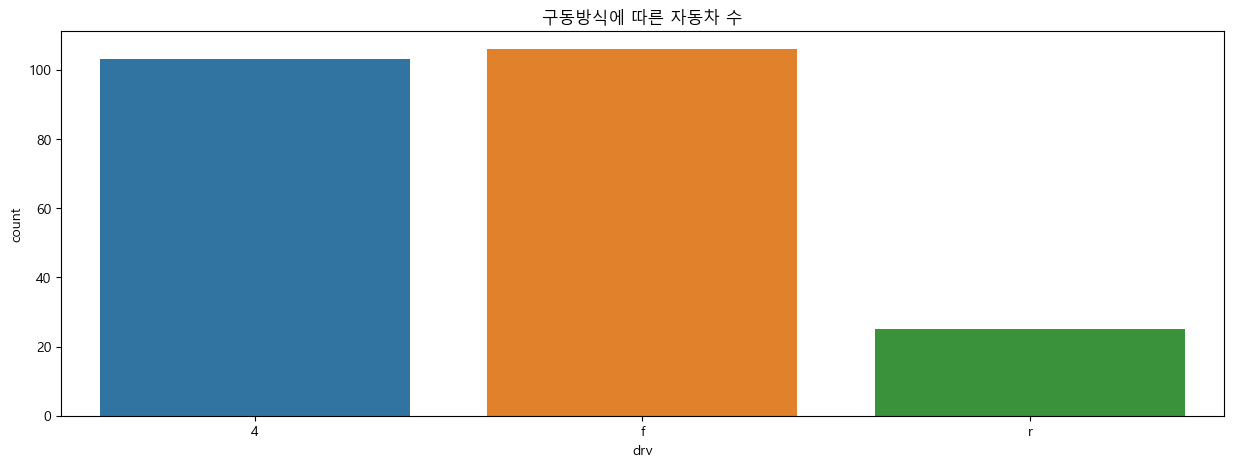

In [10]:
sb.countplot(data=df, x='drv')
plt.title("구동방식에 따른 자동차 수")
plt.show()
plt.close()

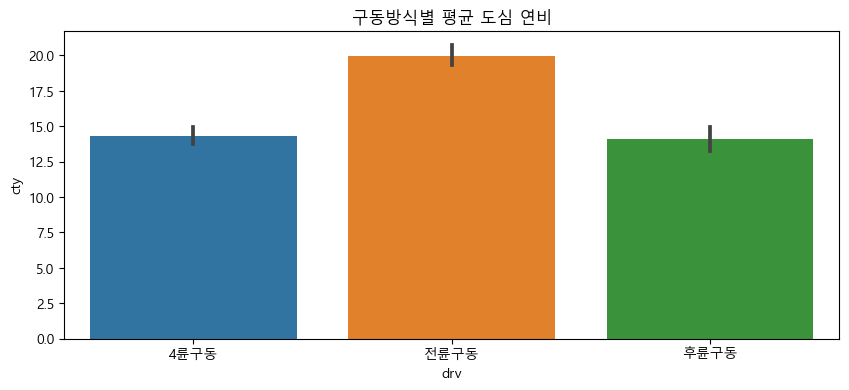

In [11]:
plt.rcParams["figure.figsize"] = (10, 4)

sb.barplot(data=df, x='drv', y='cty', estimator='mean')
plt.title("구동방식별 평균 도심 연비")
plt.xticks([0, 1, 2], ['4륜구동', '전륜구동', '후륜구동'])
plt.show()
plt.close()

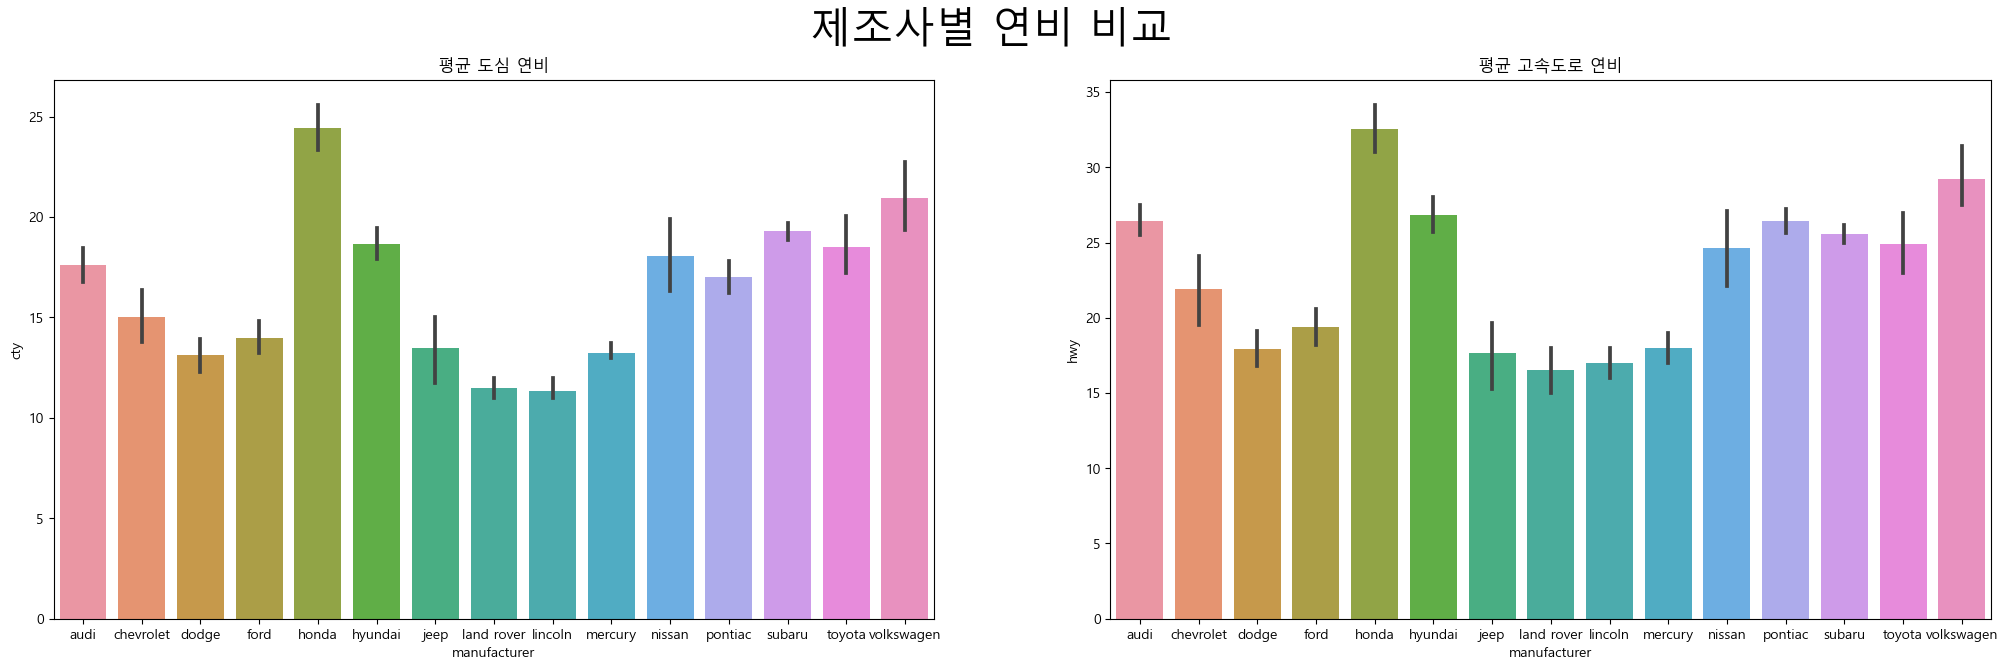

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

fig.subplots_adjust(wspace=0.2)

fig.suptitle('제조사별 연비 비교', fontsize=30)

sb.barplot(data=df, x='manufacturer', y='cty', estimator='mean', ax=ax1)
sb.barplot(data=df, x='manufacturer', y='hwy', estimator='mean', ax=ax2)

ax1.title.set_text("평균 도심 연비")
ax2.title.set_text("평균 고속도로 연비")

plt.show()
plt.close()

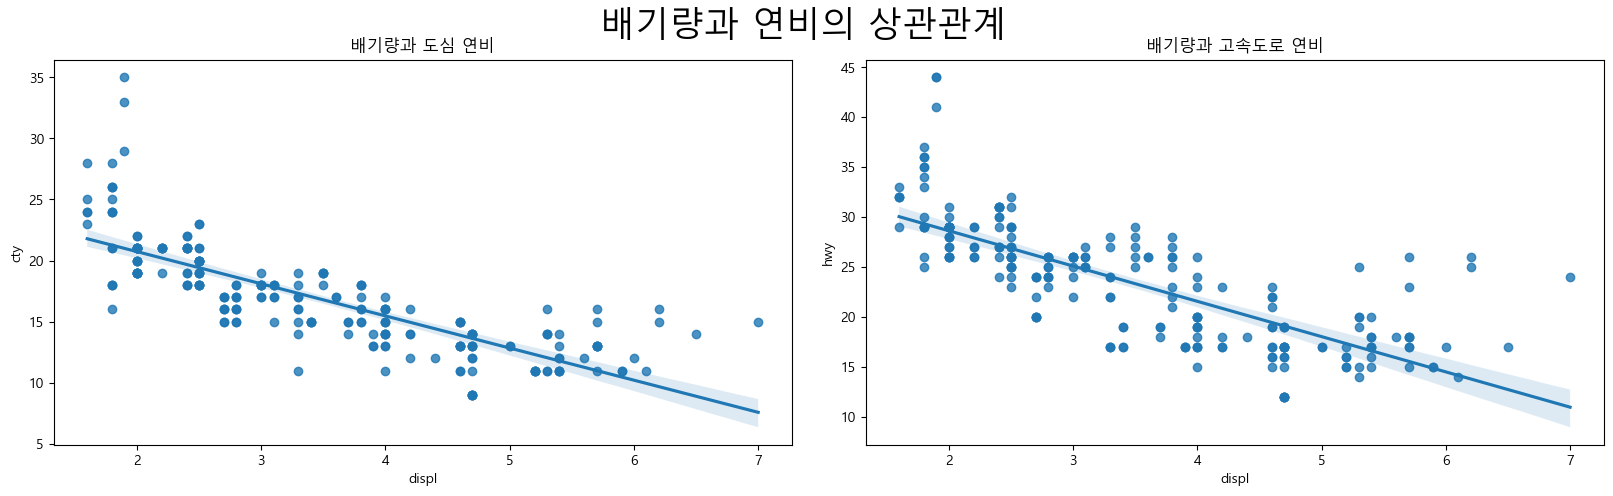

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

fig.subplots_adjust(wspace=0.1)

fig.suptitle('배기량과 연비의 상관관계', fontsize=25)

sb.regplot(data=df, x='displ', y='cty', ax=ax1)
sb.regplot(data=df, x='displ', y='hwy', ax=ax2)

ax1.title.set_text("배기량과 도심 연비")
ax2.title.set_text("배기량과 고속도로 연비")

plt.show()
plt.close()